In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_group = pd.read_csv("COVID-19-Dataset/full_grouped.csv")

In [3]:
df_group.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


Analysis

In [4]:
df_group.shape

(35156, 10)

In [5]:
#how many country
country  = df_group["Country/Region"].unique()
number_country = len(country)
number_country

187

In [6]:
date = sorted(df_group["Date"].unique())
print(f"{date[0]} -> {date[-1]}")

2020-01-22 -> 2020-07-27


In [7]:
df_group.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

In [8]:
df_group.duplicated().sum()

np.int64(0)

In [9]:
df_target_recover = df_group.groupby("Country/Region")["Recovered"].sum().reset_index()
df_target_recover.sort_values("Recovered", ascending=  False).head()


,Country/Region,Recovered
173,US,56353416
23,Brazil,54492873
138,Russia,25120448
79,India,23783720
65,Germany,17107839


In [10]:
df_group.columns

Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region'],
      dtype='str')

In [11]:
us_cases = df_group[df_group["Country/Region"] == 'US'].groupby("Country/Region")[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
us_cases

,Country/Region,Confirmed,Deaths,Recovered,Active
0,US,224345948,11011411,56353416,156981121


In [12]:
us_cases.set_index("Country/Region", inplace = True)
pp = ['#780000', '#cdb4db','#fb8500', '#06d6a0']

Text(0, 0.5, 'Number of Cases')

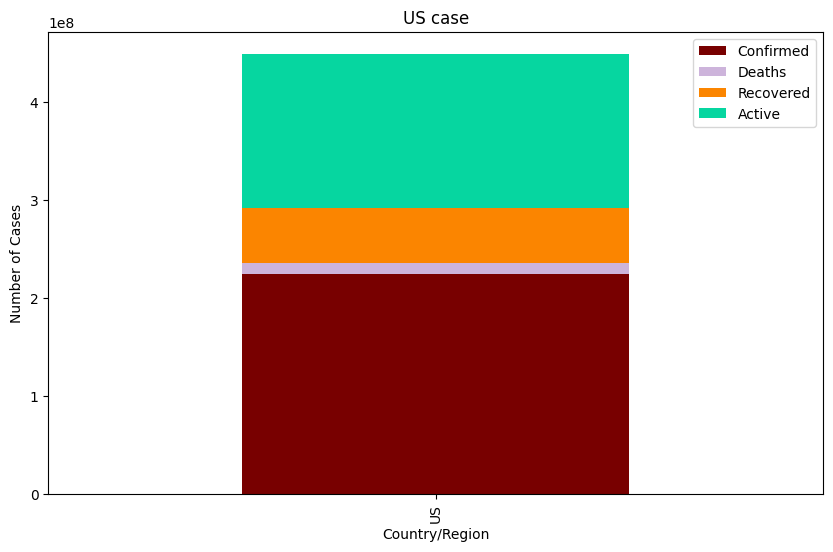

In [13]:
ax = us_cases[['Confirmed', 'Deaths', 'Recovered', 'Active']].plot(kind= 'bar',stacked = True,  figsize= (10 , 6), color = pp)
plt.title("US case")
plt.xlabel("Country/Region")
plt.ylabel("Number of Cases")

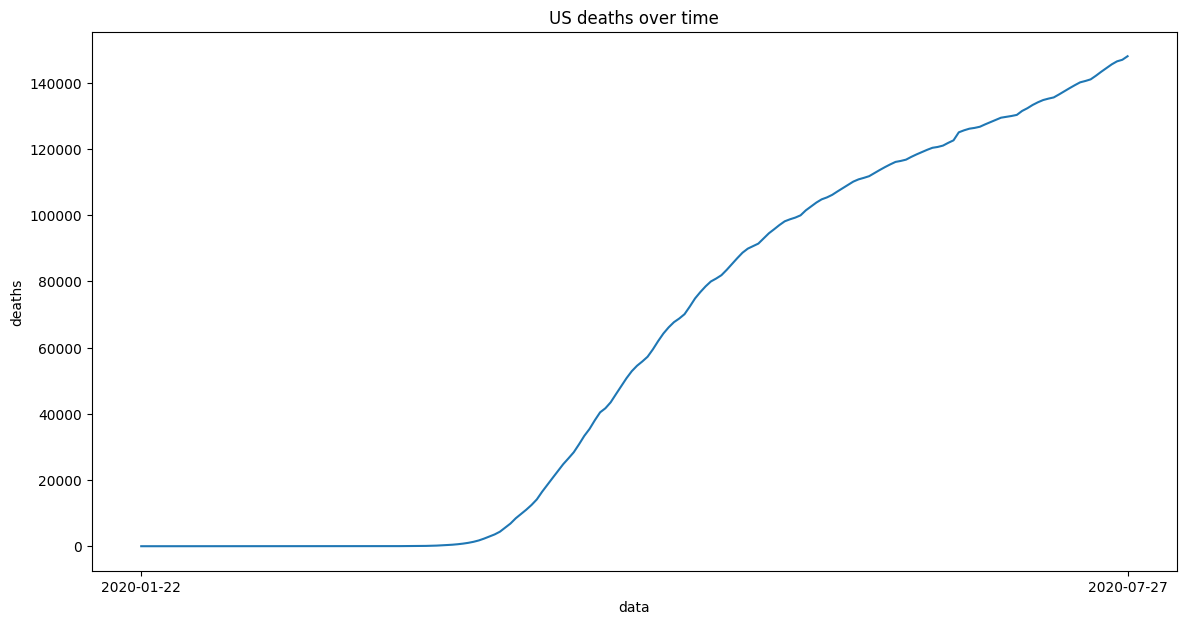

In [27]:
us_dealth = df_group[df_group["Country/Region"] == "US"]

plt.figure(figsize=(14, 7))
plt.plot(us_dealth["Date"], us_dealth["Deaths"])
plt.title("US deaths over time")
plt.xlabel("data")
plt.ylabel("deaths")
plt.xticks([us_dealth["Date"].iloc[0], us_dealth["Date"].iloc[-1]])
plt.show()

In [30]:
case_index = df_group.groupby("Date")[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
case_index.head().sort_values("Active", ascending= False)

,Date,Confirmed,Deaths,Recovered,Active
4,2020-01-26,2118,56,52,2010
3,2020-01-25,1434,42,39,1353
2,2020-01-24,941,26,36,879
1,2020-01-23,654,18,30,606
0,2020-01-22,555,17,28,510


# Number of Death Forecasting in particular country

In [31]:
country_info = df_group[df_group["Country/Region"] == "US"]
country_info

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
173,2020-01-22,US,1,0,0,1,0,0,0,Americas
360,2020-01-23,US,1,0,0,1,0,0,0,Americas
547,2020-01-24,US,2,0,0,2,1,0,0,Americas
734,2020-01-25,US,2,0,0,2,0,0,0,Americas
921,2020-01-26,US,5,0,0,5,3,0,0,Americas
...,...,...,...,...,...,...,...,...,...,...
34394,2020-07-23,US,4038816,144430,1233269,2661117,68695,1114,22420,Americas
34581,2020-07-24,US,4112531,145560,1261624,2705347,73715,1130,28355,Americas
34768,2020-07-25,US,4178970,146465,1279414,2753091,66439,905,17790,Americas
34955,2020-07-26,US,4233923,146935,1297863,2789125,54953,470,18449,Americas


In [32]:
data = np.array(country_info["Deaths"].values)

In [33]:
data

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      1,      1,
            6,      7,     11,     12,     14,     17,     21,     22,
           28,     33,     43,     52,     58,     70,     97,    131,
          188,    265,    362,    456,    601,    784,   1021,   1333,
         1746,   2300,   2934,   3561,   4381,   5605,   6846,   8432,
         9747,  11031,  12470,  14138,  16447,  18563,  20638,  22731,
        24777,  26548,  28376,  30780,  33329,  35442,  38056,  40442,
        41671,  43466,  45923,  48312,  50749,  52867,  54517,  55810,
        57235,  59454,  61960,  64256,  66125,  67681,  68777,  70086,
        72393,  74851,  76770,  78497,  79976,  80855,  81868,  83483,
      

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [59]:
def createXy(data, num):
    X = []
    y= []
    for i in range(len(data) - num):
        X.append(data[i:i+ num])
        y.append(data[i+num])
    return np.array(X), np.array(y)
num = 7
X, y= createXy(data, 7)

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.3, random_state=42,shuffle=False)
X_train.shape,  X_test.shape, y_train.shape, y_test.shape

((126, 7), (55, 7), (126,), (55,))

In [60]:
model = LinearRegression()
model.fit(X_train , y_train)


y_pred = model.predict(X_test)

#Nen de y_test truoc
test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f'Test MSE: {test_mse}')
print(f'Test MAE: {test_mae}')
print(f'Test R²: {test_r2}')

# Print some predictions
print(f'Predictions: {y_pred[:10]}')
print(f'Actual values: {y_test[:10]}')

Test MSE: 246064.28028447783
Test MAE: 322.5146545441239
Test R²: 0.998044125890038
Predictions: [108110.90112369 109066.31267272 110069.76535847 110766.74237685
 111295.19854804 111761.67833179 112317.87923343 113629.67265811
 114338.91604917 115220.36176308]
Actual values: [108159 109168 110138 110818 111269 111774 112714 113631 114512 115334]


<function matplotlib.pyplot.show(close=None, block=None)>

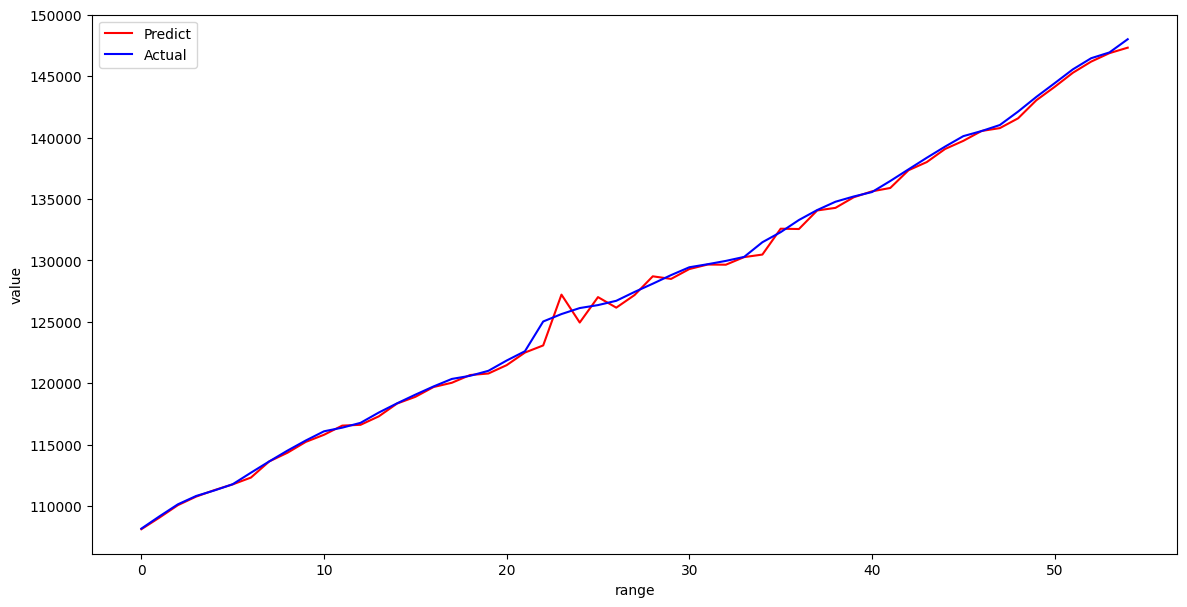

In [63]:
plt.figure(figsize= (14, 7))
plt.plot(y_pred,label = "Predict", color = "red")
plt.plot(y_test,label = "Actual", color = "Blue")
plt.xlabel("range")
plt.ylabel("value")
plt.legend()
plt.show

In [64]:
df_day= pd.read_csv('COVID-19-Dataset/day_wise.csv')
df_day

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187


In [65]:
data = np.array(df_day["Recovered"].values)

In [70]:
data

array([     28,      30,      36,      39,      52,      61,     107,
           125,     141,     219,     281,     459,     604,     821,
          1071,    1418,    1903,    2470,    3057,    3714,    4417,
          4849,    5930,    7613,    8902,   10319,   11951,   13693,
         15394,   17369,   17966,   21849,   22304,   24047,   26652,
         29077,   31919,   35306,   38314,   41208,   44085,   46681,
         49619,   52237,   54270,   56760,   59092,   60891,   62802,
         65113,   66434,   68359,   70729,   74139,   76192,   78944,
         81427,   83064,   85509,   89775,   95990,   96456,  105997,
        111445,  119804,  128508,  136800,  146261,  161707,  174074,
        189434,  206052,  221060,  241072,  254477,  270812,  293665,
        322017,  346349,  367477,  392991,  411864,  438395,  463014,
        498925,  529015,  554287,  577789,  608557,  629862,  664043,
        693207,  721689,  771329,  798239,  825969,  852382,  884680,
        925752,  989

In [71]:
def createxy(data, num):
    X, y = [], []
    for i in range(len(data) - num):
        X.append(data[i: i+ num])
        y.append(data[i+num])
    return np.array(X), np.array(y)

X, y = createxy(data, 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((130, 2), (130,), (56, 2), (56,))

In [72]:
model = LinearRegression()
model.fit(X_train , y_train)

y_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f'Test MSE: {test_mse}')
print(f'Test MAE: {test_mae}')
print(f'Test R²: {test_r2}')

# Print some predictions
print(f'Predictions: {y_pred[:10]}')
print(f'Actual values: {y_test[:10]}')

Test MSE: 2493905544.85422
Test MAE: 41117.29271228904
Test R²: 0.9993643780239527
Predictions: [2714296.87572155 2831716.30850276 2905891.69382722 2974661.30718197
 3044183.66603084 3117627.84862459 3169421.25600119 3346373.89136625
 3413332.56077236 3492288.24385671]
Actual values: [2743083 2821430 2890776 2959037 3030214 3084718 3235640 3317121 3395154
 3480121]


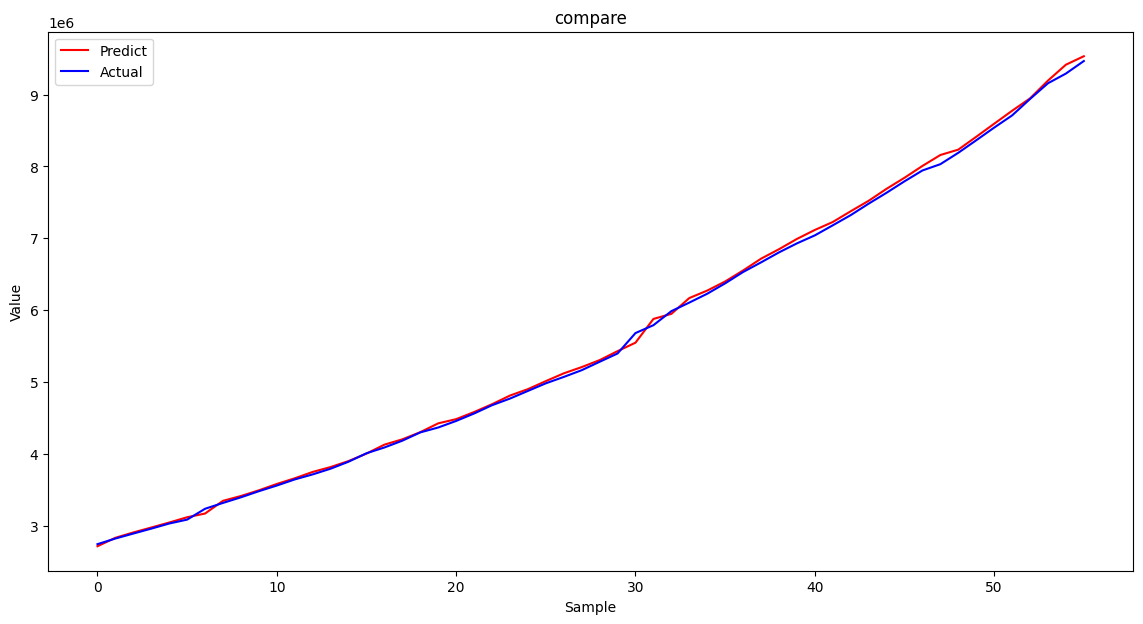

In [73]:
plt.figure(figsize = (14, 7))
plt.plot(y_pred, label  ="Predict", color = "red")
plt.plot(y_test, label  ="Actual", color = "blue")
plt.title("compare")
plt.legend()
plt.xlabel("Sample")
plt.ylabel("Value")
plt.show()